# <div align="center"> Google Satellite & Maps </div>

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np

from tqdm import tqdm
from k12libs.utils.nb_easy import K12AI_DATASETS_ROOT
from IPython.display import display
from PIL import Image

[数据集下载](http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz)

## 加载原始数据集

In [3]:
pro_data_root = os.path.join(K12AI_DATASETS_ROOT, 'cv', 'satellite_maps')
raw_data_root = os.path.join(pro_data_root, 'raw')

In [4]:
def load_images(phase='train'):
    files = []
    with os.scandir(os.path.join(raw_data_root, phase)) as it:
        for entry in it:
            files.append(entry.path) 
    return files

raw_train_images = load_images(phase='train')
raw_valid_images = load_images(phase='val')
print("train count:", len(raw_train_images), "\nvalid count:", len(raw_valid_images))

train count: 1096 
valid count: 1098


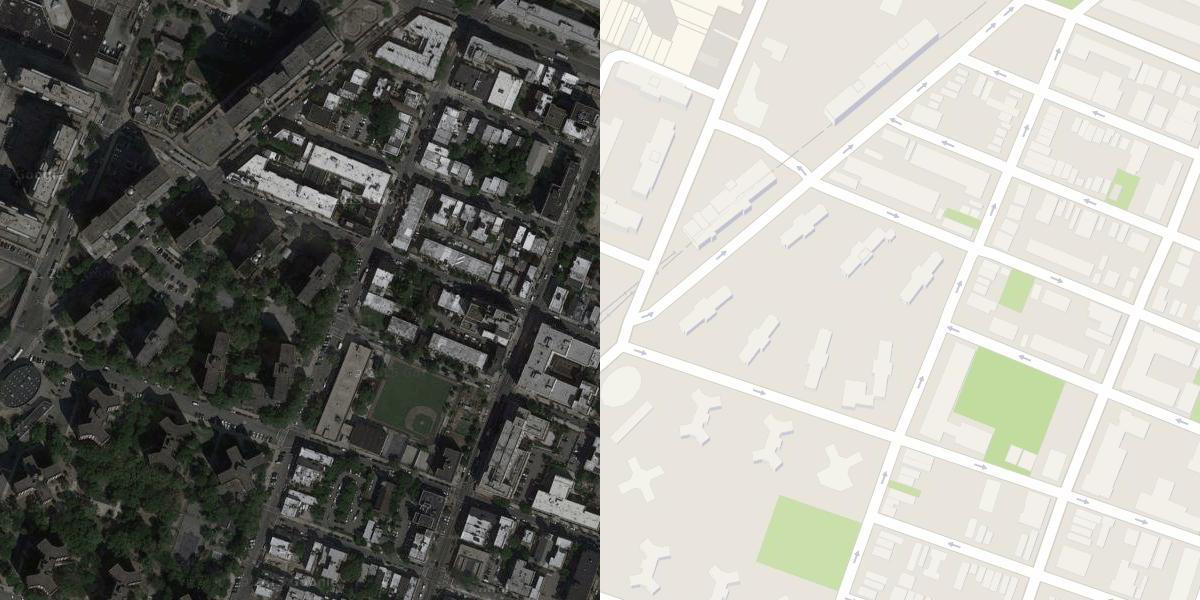

('RGB',
 (1200, 600),
 None,
 '/data/datasets/cv/satellite_maps/raw/train/101.jpg')

In [5]:
sample_image = Image.open(raw_train_images[0])
sample_image.mode, sample_image.size, display(sample_image), raw_train_images[0]

## 切割图片为两部分(sat & map)

In [6]:
# Image --> numpy
sample_image_np = np.array(sample_image)
sample_image_np.shape

(600, 1200, 3)

Sat Image:


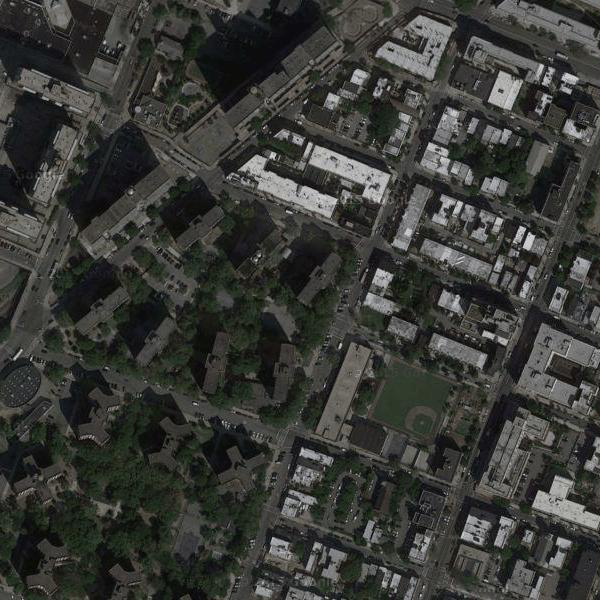

Map Image:


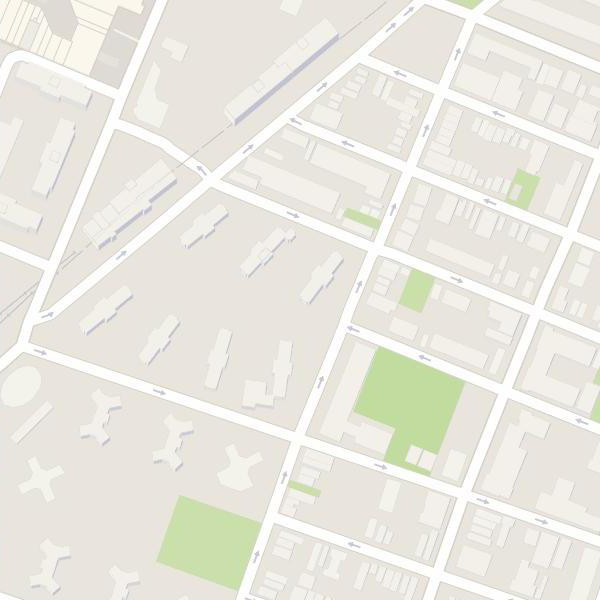

In [7]:
def split_images(image_path):
    image_pil = Image.open(image_path)
    image_np = np.array(image_pil)
    if image_np.shape != sample_image_np.shape:
        print("Warning: found not match width or height")
    split_wd = int(image_np.shape[1]/2)
    sat_image, map_image = Image.fromarray(image_np[:, :split_wd]), Image.fromarray(image_np[:, split_wd:])
    return sat_image, map_image

test_sat_image, test_map_image = split_images(raw_train_images[0])
print("Sat Image:")
display(test_sat_image)
print("Map Image:")
display(test_map_image)

## 预处理数据集

In [8]:
def preprocess_datasets(phase, images):
    sat_path = os.path.join(pro_data_root, phase, 'imageA')
    map_path = os.path.join(pro_data_root, phase, 'imageB')
    if not os.path.exists(sat_path) or not os.path.exists(map_path):
        os.makedirs(sat_path)
        os.makedirs(map_path)
    for path in tqdm(images):
        sat_image_pil, map_image_pil = split_images(path)
        sat_image_pil.save(os.path.join(sat_path, os.path.basename(path)))
        map_image_pil.save(os.path.join(map_path, os.path.basename(path)))
        
# 处理训练集
preprocess_datasets('train', raw_train_images)

# 处理验证集
preprocess_datasets('val', raw_valid_images)

100%|██████████| 1098/1098 [00:54<00:00, 20.27it/s]


## References

1. http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz
2. https://machinelearningmastery.com/how-to-develop-a-pix2pix-gan-for-image-to-image-translation/